In [153]:
import pandas as pd
import numpy as np
import random
import math
from copy import deepcopy
import random
import matplotlib.pyplot as plt

In [154]:
def distance(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)

In [155]:
data_frame = pd.read_csv('overdoses.csv', delimiter = ',')
data_frame['Population'] = data_frame['Population'].str.replace(',', '')
data_frame['Deaths'] = data_frame['Deaths'].str.replace(',', '')
data_frame[data_frame.columns[1:3]] = data_frame[data_frame.columns[1:3]].astype(float)
population_deaths_data = data_frame[['Population', 'Deaths']]
population_deaths_data.shape


(50, 2)

In [162]:
final = []
for k in range(2,16):
    max_itr = 500
    clusters = {}
    centroids = np.zeros((k,population_deaths_data.shape[1]))
    C_index = random.sample(range(population_deaths_data.shape[0]), k)
    C = population_deaths_data.values[C_index, :]
    _c = np.zeros(C.shape)

    itr = 1
    while(distance(C,_c,None) > 0.0001):
        for i in range(k):
            clusters[i] = []
        if itr == max_itr:
            break

        for i in range(population_deaths_data.shape[0]):
            assigned_cluster = np.argmin(distance(population_deaths_data.values[i,:], C))
            clusters[assigned_cluster].append(i)
          
        _c = deepcopy(C)
        
        for i in range(k):
            C[i] = np.mean(population_deaths_data.values[clusters[i]], axis = 0)
        itr += 1
       
    '''
    Calculating Objective Function
    '''
    if (k==5):
        print('No of Clusters(k) =',k)
        for i in range(k):
            print( 'Cluster-',i,':',clusters[i])
            print
       
    L=0    
    for i in range(k):
        temp_data = population_deaths_data.values[clusters[i], :]
        for j in range(temp_data.shape[0]):
            L += math.pow(distance(temp_data[j], C[i], ax=0),2)
    final.append(L)


No of Clusters(k) = 5
Cluster- 0 : [4, 42]
Cluster- 1 : [0, 3, 5, 6, 14, 15, 16, 17, 22, 23, 27, 35, 36, 39, 43]
Cluster- 2 : [2, 9, 13, 19, 20, 21, 24, 29, 32, 41, 45, 46, 48]
Cluster- 3 : [8, 12, 31, 34, 37]
Cluster- 4 : [1, 7, 10, 11, 18, 25, 26, 28, 30, 33, 38, 40, 44, 47, 49]


In [169]:
final

[758191953007749.0,
 394251040265297.4,
 290288478673405.7,
 180602527594782.9,
 266130308101881.28,
 256813862741915.25,
 255211333419573.34,
 256208958777128.12,
 253631024300494.0,
 254807925576149.3,
 237030694688199.3,
 254290807763935.6,
 35852396687773.37,
 75299677754352.25]

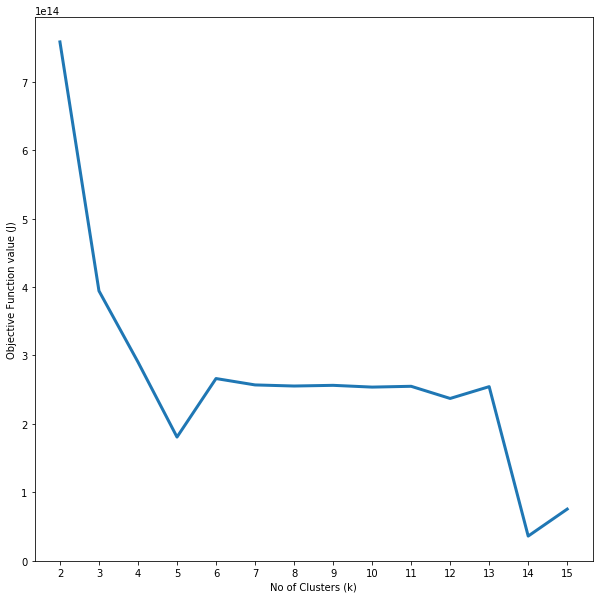

<Figure size 432x288 with 0 Axes>

In [168]:
plt.figure(figsize=(10, 10))
plt.plot(np.arange(2,16,1), final,linewidth=3.0)
plt.xticks(np.arange(2,16,1))
plt.xlabel('No of Clusters (k)')
plt.ylabel('Objective Function value (J)')
plt.show()
plt.savefig('graph.png')